In [20]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline

# 나눔고딕 폰트 경로 설정
font_path = '/content/drive/MyDrive/새만금 공공 빅데이터 분석 공모전/경희/NanumGothic.ttf'

# 폰트 경로 추가
fm.fontManager.addfont(font_path)

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

# 상관계수 (인구밀도, 충전소의 개수 -> 전기차 개수)

In [15]:
df = pd.read_excel('/content/drive/MyDrive/새만금 공공 빅데이터 분석 공모전/경희/경희2/경희_지역별 전기차 개수, 충전소 개수, 사용량 현황, 인구밀도.xlsx')
df = df.drop(df.columns[0], axis=1)

df

,광역지자체,전기차 개수,충전소 개수,사용량(키로와트시),인구밀도
0,서울,41140,692,19436562,15650.1
1,인천,12942,241,6288558,2772.8
2,경기,40239,983,27808619,1338.9
3,강원,8042,563,12102816,90.4
4,충북,8184,377,9827635,219.4
5,충남,10015,474,10320353,263.8
6,대전,7675,175,6073732,2742.8
7,세종,1879,59,1496166,787.7
8,경북,11269,764,17079885,138.4
9,대구,16169,309,10261777,2702.2


<ipython-input-21-ea29b8a4d03b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


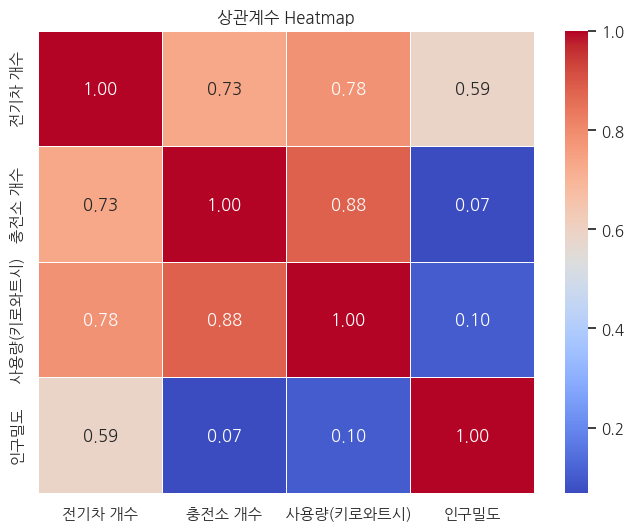

In [21]:
correlation_matrix = df.corr()

correlation_matrix

# Heatmap으로 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("상관계수 Heatmap")
plt.show()

In [24]:
df2 = pd.read_csv('/content/drive/MyDrive/새만금 공공 빅데이터 분석 공모전/경희/경희2/한국전력공사_지역별 전기차 현황정보.csv', encoding='EUC-KR')

df2.head()

,기준일,서울,인천,경기,강원,충북,충남,대전,세종,경북,대구,전북,전남,광주,경남,부산,울산,제주,합계
0,2022-01-31,41140,12942,40239,8042,8184,10015,7675,1879,11269,16169,7389,8837,5204,12725,12501,3180,25580,232970
1,2022-02-28,41693,13179,41266,8179,8664,10525,7902,1902,11540,17091,7456,9203,5652,13536,13805,3405,26184,241182
2,2022-03-31,43206,14134,45891,8652,9683,11532,8595,2069,12318,17584,8404,9978,6015,14371,15330,3789,26702,258253
3,2022-04-30,45133,15191,50111,9117,10421,12142,9550,2180,13018,18076,8931,10658,6233,14957,16059,3948,26931,272656
4,2022-05-31,46723,16859,53239,9666,11209,12712,10213,2307,13839,18808,9310,11102,6462,15821,16630,4134,27224,286258


In [ ]:
# 전기차 대수 증가율 계산
df['전기차대수_증가율(%)'] = df['전기차대수'].pct_change() * 100

# 첫 번째 행에는 증가율이 없으므로 NaN으로 처리
df.loc[df.index[0], '전기차대수_증가율(%)'] = 0
